In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

from scipy import optimize
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa import stattools
from statsmodels.tsa.statespace import tools 
from statsmodels.tsa.arima_process import ArmaProcess

In [20]:
#Importing the data

url='https://www.kaggle.com/datasets/saurabhshahane/electricity-load-forecasting/data?select=continuous+dataset.csv'
df = pd.read_csv(url)
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [29]:
datetime = pd.DatetimeIndex(df['datetime'])
arraydatetime = np.array(datetime.year)
arraydatetime = np.where(arraydatetime== 2020,True,False)
datetime_2020 = df[arraydatetime]
datetime_2020

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
43775,2020-01-01 00:00:00,1032.2630,25.809259,0.018042,0.032806,14.849625,23.301447,0.017035,0.021866,4.559083,22.598322,0.016195,0.068054,3.737708,1,1,0
43776,2020-01-01 01:00:00,1017.5806,25.650842,0.018065,0.053177,15.933757,23.041467,0.016936,0.023796,4.846412,22.471155,0.016104,0.080109,3.591759,1,1,0
43777,2020-01-01 02:00:00,1000.2797,25.501489,0.018119,0.069000,16.806818,22.806177,0.016822,0.024910,5.204608,22.368677,0.016013,0.094757,3.704177,1,1,0
43778,2020-01-01 03:00:00,987.2383,25.430994,0.018142,0.080017,17.460632,22.657556,0.016746,0.025208,5.628076,22.282556,0.015937,0.107086,3.936592,1,1,0
43779,2020-01-01 04:00:00,970.3667,25.360132,0.018204,0.084137,16.632112,22.539819,0.016647,0.022789,5.729821,22.203882,0.015862,0.113800,4.088643,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


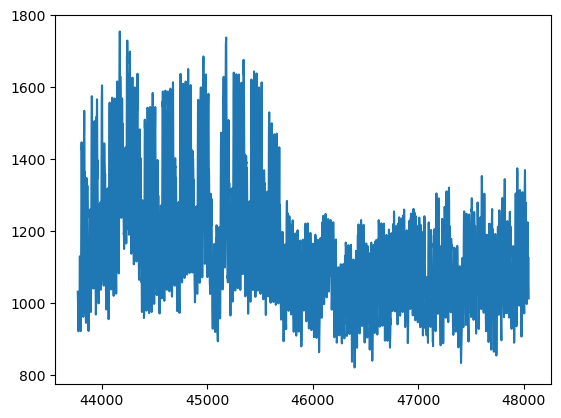

In [30]:
X = datetime_2020['nat_demand']
plt.plot(X)

In [31]:
stattools.adfuller(X)

(-4.27845195705295,
 0.0004839668074891522,
 30,
 4242,
 {'1%': -3.4318924944625144,
  '5%': -2.8622215889531386,
  '10%': -2.5671328152257535},
 39271.06491257598)

In [32]:
#EDA


X.describe()

count    4273.000000
mean     1170.231495
std       176.121214
min       821.847600
25%      1041.354300
50%      1137.803300
75%      1259.308900
max      1754.882000
Name: nat_demand, dtype: float64

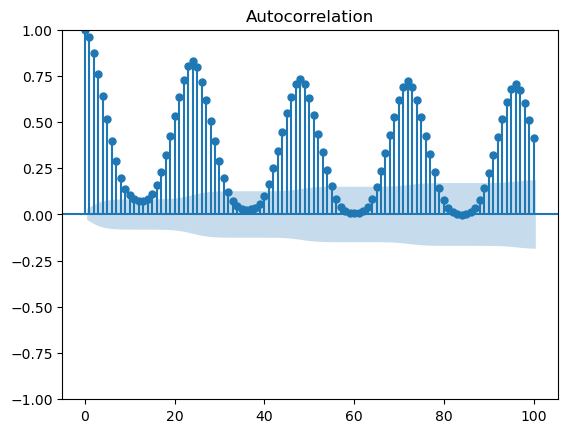

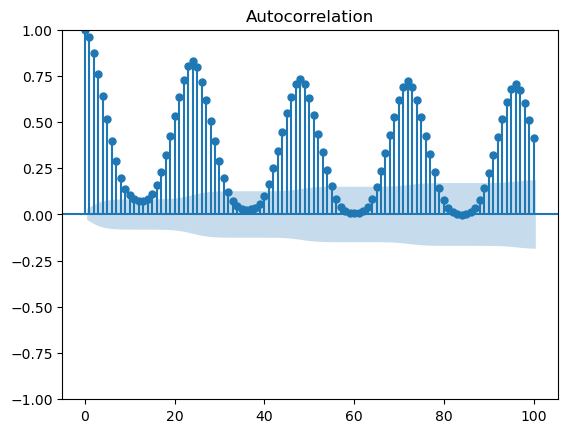

In [33]:
sm.tsa.graphics.plot_acf(X,lags = 100)

In [35]:
df_new = pd.DataFrame(datetime_2020[['datetime','nat_demand']])
df_new.set_index(df_new['datetime'],inplace = True)
df_new

,datetime,nat_demand
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,1032.2630
2020-01-01 01:00:00,2020-01-01 01:00:00,1017.5806
2020-01-01 02:00:00,2020-01-01 02:00:00,1000.2797
2020-01-01 03:00:00,2020-01-01 03:00:00,987.2383
2020-01-01 04:00:00,2020-01-01 04:00:00,970.3667
...,...,...
2020-06-26 20:00:00,2020-06-26 20:00:00,1128.5592
2020-06-26 21:00:00,2020-06-26 21:00:00,1112.7488
2020-06-26 22:00:00,2020-06-26 22:00:00,1081.5680


In [36]:
index = pd.DatetimeIndex(df_new.index)
np.c_[np.array(index.month),np.array(index.day)]

array([[ 1,  1],
       [ 1,  1],
       [ 1,  1],
       ...,
       [ 6, 26],
       [ 6, 26],
       [ 6, 27]], dtype=int64)

In [37]:
index.day[:30*23]

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            29, 29, 29, 29, 29, 29, 29, 29, 29, 29],
           dtype='int64', name='datetime', length=690)

In [39]:
pivot = pd.pivot_table(df_new, values = 'nat_demand',index = index.hour, columns = index.day)
pd.DataFrame(pivot)

datetime,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
datetime,,,,,,,,,,,,,,,,,,,,,
0,1089.832850,1077.824133,1093.624317,1101.388833,1119.255283,1114.125617,1157.006483,1124.276667,1124.881917,1112.259900,...,1130.197050,1088.302083,1086.387017,1110.525800,1098.004750,1070.224083,1077.00022,1092.61212,1083.953725,1065.429067
1,1057.714650,1035.956883,1050.716717,1062.837850,1077.860550,1073.605700,1112.128350,1097.716733,1089.752333,1071.789767,...,1093.417200,1061.625200,1047.765733,1057.438150,1058.675850,1046.200300,1037.27540,1052.71522,1036.344925,1044.956333
2,1025.841317,1012.445683,1013.274933,1034.183567,1047.033183,1042.527167,1075.860050,1057.641800,1057.257183,1041.207333,...,1060.248883,1026.690767,1018.047333,1021.090633,1026.555617,1017.040820,1008.88400,1023.31132,1010.634625,1009.743467
3,999.145867,987.856483,991.766867,1010.431100,1019.099683,1016.243483,1050.354167,1038.701633,1035.566150,1017.474483,...,1023.510500,999.834700,992.385917,997.715333,1002.324867,989.272080,993.73156,999.44560,990.681225,987.777167
4,982.379067,971.096633,977.633117,992.521183,1003.403433,1027.180700,1027.111150,1018.186800,1019.096500,1001.178917,...,1012.520967,987.304117,981.501100,987.757717,982.559650,978.740440,1003.86112,981.66490,971.535325,970.756533
5,974.026450,972.286133,979.040467,997.907383,1004.288150,1034.939150,1023.659083,1015.569100,1023.025750,1009.909950,...,1013.144367,990.417067,981.122633,971.285367,977.532033,978.681600,1007.21994,987.20036,964.198250,964.459467
6,945.959450,962.131000,969.718600,992.240033,981.103967,1027.212667,1005.429317,999.378867,1007.991100,1002.658817,...,1000.292600,970.049167,965.320783,959.111600,956.630333,977.206080,1002.73240,965.40124,952.401175,945.500433
7,979.399917,1023.508983,1055.159283,1064.379500,1047.623333,1111.177183,1058.900883,1066.987483,1048.430317,1071.276533,...,1068.881117,1035.857283,1025.303667,1019.323633,996.752033,1069.799980,1079.29204,1026.58830,1018.882100,994.615000
8,1047.036733,1120.480500,1174.586683,1182.942950,1144.580467,1233.441000,1161.432767,1159.630233,1134.726567,1175.126200,...,1157.214700,1131.521533,1119.901833,1103.028950,1067.987450,1178.260820,1190.12862,1114.64882,1103.286550,1068.581200


<AxesSubplot:xlabel='datetime'>

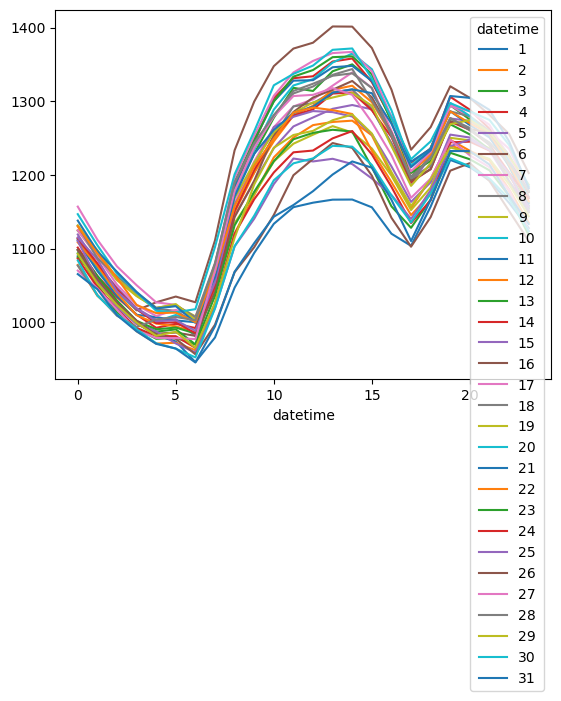

In [40]:
#chekcing for seasonality

pivot.plot()

In [41]:
autocorrelations =stattools.acf(X,nlags=80)
autocorrelations

array([1.        , 0.9608059 , 0.87323666, 0.7616736 , 0.63868302,
       0.51494363, 0.39580612, 0.28760781, 0.19967667, 0.13787027,
       0.10274634, 0.08404738, 0.0744118 , 0.07505865, 0.08411279,
       0.10830139, 0.15723373, 0.23067431, 0.32286105, 0.42535024,
       0.53139944, 0.63609583, 0.73026314, 0.80280506, 0.83155533,
       0.79668603, 0.71787741, 0.61764991, 0.50705051, 0.39635672,
       0.29057336, 0.19592575, 0.12102897, 0.07044508, 0.0435958 ,
       0.0305524 , 0.02470758, 0.02700871, 0.03553854, 0.05685764,
       0.10037367, 0.16616434, 0.25057549, 0.34593526, 0.44638832,
       0.54661108, 0.63698904, 0.70694234, 0.73559775, 0.70399472,
       0.63143735, 0.5390426 , 0.43759137, 0.3360063 , 0.23933068,
       0.15333028, 0.08604427, 0.04167111, 0.01941012, 0.00965918,
       0.00578891, 0.00937909, 0.01875821, 0.04057874, 0.08454592,
       0.1508026 , 0.23520855, 0.33029821, 0.43015462, 0.52995606,
       0.62022551, 0.690647  , 0.72011969, 0.68953921, 0.61803

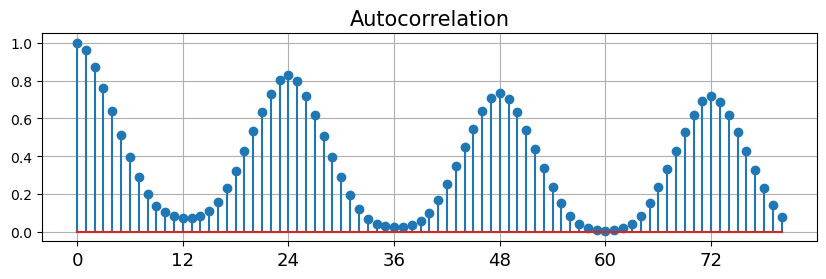

In [42]:
fig = plt.figure(figsize=(10, 2.7))
plt.stem(autocorrelations)
plt.title('Autocorrelation', fontsize=15)
plt.xticks(range(0, 80, 12), fontsize=13)
plt.grid()
plt.show()

In [43]:
season = 24

In [44]:
#Stationarity check

get_p_value = lambda X: stattools.adfuller(X)[1]

p_value = get_p_value(X)
print('p-value for the data, X = ', p_value)

p-value for the data, X =  0.0004839668074891522


In [45]:
#SEASONAL DIFFERENCE DATA
D_X = tools.diff(X,k_diff=0,k_seasonal_diff=1,seasonal_periods=24)

In [67]:
import statsmodels.api as sm


def plot_series(X, X_=None,
                figsize=(16, 6), title='Time Series Plot', x_label='Date', y_label='Value of X',
                forecast=False, season=None):
   
    """Plots the time series data X.

    Args:
        X (np.array): Time-series data
        X_ (np.array): Forecasted time-series data
        title (str) - Title for the figure
        y_label (str) - y-label for the figure
        figsize (tuple): Size of figure
        forecast (bool): if true appends predictions after observed data
        season (int): season

    """
    
    fig = plt.figure(figsize=figsize)

    if type(X) is np.ndarray:
        plt.plot(X, linewidth=2)
    else:
        X.plot(fontsize=13, linewidth=2)

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    if season and type(X) is np.ndarray:
        plt.xticks(
            range(0, len(X) + 1 if not forecast else len(X) + len(X_) + 1, season),
            fontsize=13
        )

    if X_ is not None:
        if not forecast:
            plt.plot(X_, linewidth=2)
        else:
            plt.plot(range(len(X), len(X_) + len(X)), X_, linewidth=2)
        plt.legend(['True Values', 'Forecasted Values'], fontsize=14)

    plt.grid()
    plt.show()


def plot_graphs(X=None, lags=80, season=None):
    """ Plots ACF and PACF graphs
        
    Args:
        X (np.array): Time-series data
        lags (int): number of lags up to which ACF and PACF plots will be shown
        season (int): season  
    
    """
    
    fig = plt.figure(figsize=(10, 6))
    fig.subplots_adjust(hspace=0.5)

    ax1 = fig.add_subplot(211)

    sm.graphics.tsa.plot_acf(X, ax=ax1, lags=lags)
    plt.title('Autocorrelation', fontsize=15)
    if season:
        plt.xticks(range(0, lags + 1, season), fontsize=14)
    plt.grid()

    ax2 = fig.add_subplot(212)

    sm.graphics.tsa.plot_pacf(X, ax=ax2, lags=lags)
    plt.title('Partial Autocorrelation', fontsize=15)
    if season:
        plt.xticks(range(0, lags + 1, season), fontsize=14)
    plt.grid()
    plt.show()

p-value for the differenced data, D_X =  1.3975249608044741e-21


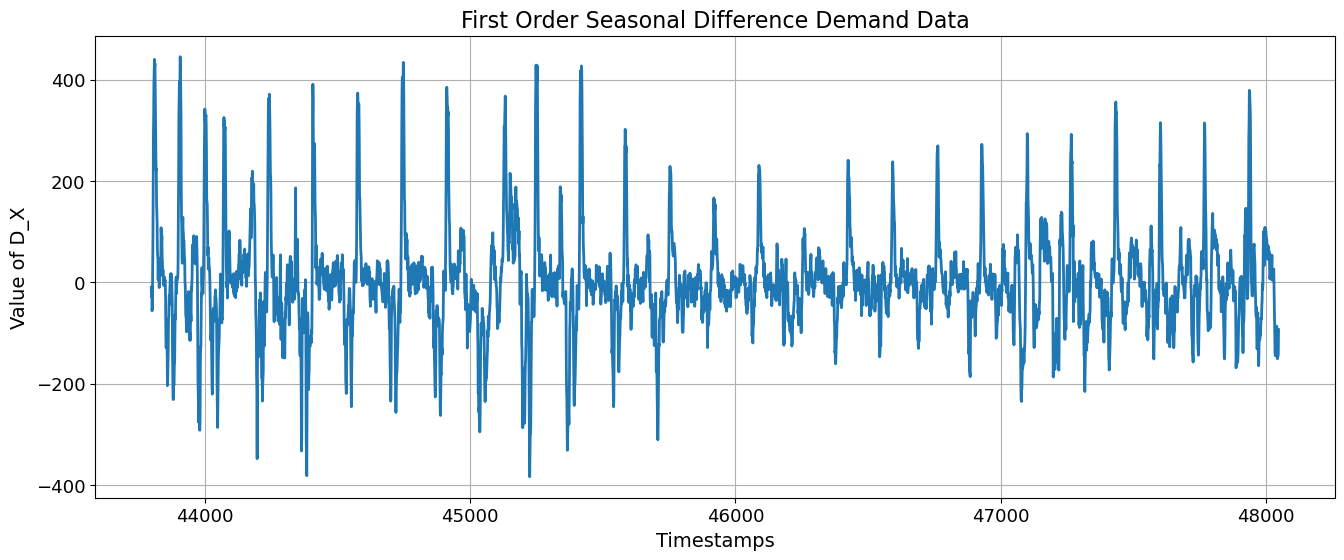

In [97]:
p_value = get_p_value(D_X)
print('p-value for the differenced data, D_X = ', p_value)

plot_series(
    D_X, 
    title='First Order Seasonal Difference Demand Data',
    x_label='Timestamps', y_label='Value of D_X'
)

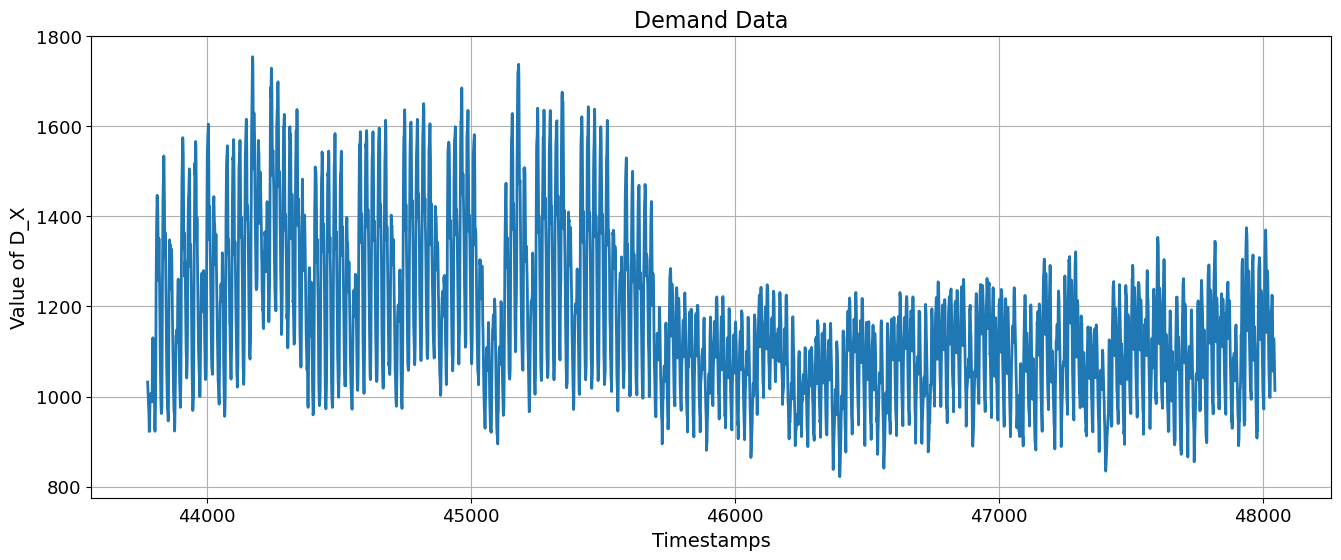

In [96]:
plot_series(
    X, 
    title='Demand Data',
    x_label='Timestamps', y_label='Value of D_X'
)

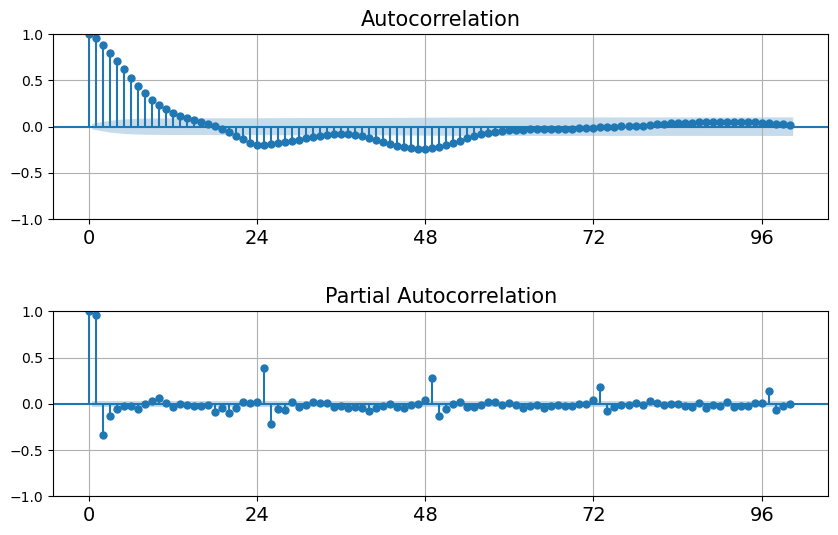

In [49]:
plot_graphs(D_X, season=season,lags = 100)

In [50]:
d= 0 
D =1

In [51]:
# Non-seasonal orders
p_ = (0, 12)
q_ = (0, 4)

# Seasonal orders
P_ = (0, 0)
Q_ = (1, 1)

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
get_SARIMA_model= lambda X,p,d,q,P,D,Q,s: SARIMAX(X,order = (p,d,q),seasonal_order = (P,D,Q,s))

In [53]:
def f(order, X, d, D, s):
    """ Minimization function
        It generates a SARIMA model with provided orders and fits on the time series.
        
    Args:
        order ((int, int, int, int)): Tuple of (p, q, P, Q)
        X (np.array): Time-series data
        d (int): Non-seasonal differencing order
        D (int): Seasonal differencing order
        s (int): Season
        
    Returns:
        (float or np.inf): BIC score for the model and np.inf in case of any exception
        
    """
    p, q, P, Q = order
    try:
        model = get_SARIMA_model(X, p, d, q, P, D, Q, s)
        result = model.fit(trend='nc')
    except:
        return np.inf
    print([p, q, P, Q], result.bic)
    return result.bic


def min_order_search(X, non_seasonal_order, seasonal_order):
    """ Search the order pf the model with minimum BIC
        
    Args:
        X (np.array): Time-series data
        non_seasonal_order ((int, int, int)): p_, d, q_ 
        seasonal_order ((int, int, int, int)): P_, D, Q_
        
    Returns:
        min_order, min_seasonal_order: search results
        
    """
    (p_, d, q_), (P_, D, Q_, s) = non_seasonal_order, seasonal_order
    order_grid = [slice(order[0], order[1] + 1 , 1) for order in (p_, q_, P_, Q_)]
    
    p, q, P, Q = optimize.brute(
        f, order_grid, 
        args=(X, d, D, s), finish=None
    ).astype(int)
    
    min_order = (p, d, q)
    min_seasonal_order = (P, D, Q, s)
    
    print(
        "\nOrder with minimum BIC:\n\
          non-seasonal orders: (p,d, q) = (%d, %d, %d)\n\
          seasonal orders: (P, D, Q) = (%d, %d, %d)\n\
          season = %d"\
        %(*min_order, *min_seasonal_order[:-1], min_seasonal_order[-1])
    )
    return min_order, min_seasonal_order

In [54]:
#DONT RUN THIS AGAIN!!!!!

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('error', ConvergenceWarning)

(p, d, q), (P, D, Q, s) = min_order_search(
    X, 
    non_seasonal_order=(p_, d, q_), 
    seasonal_order=(P_, D, Q_, season)
)

[0, 0, 0, 1] 50734.548885744545
[0, 1, 0, 1] 45958.2051963074
[0, 2, 0, 1] 43022.56274617155
[0, 3, 0, 1] 41300.75267906086
[0, 4, 0, 1] 40162.204774769045
[1, 0, 0, 1] 38908.46247349732
[1, 1, 0, 1] 38396.93009775432
[1, 2, 0, 1] 38237.88717334732
[1, 3, 0, 1] 38178.98353204653
[1, 4, 0, 1] 38176.831121229035
[2, 0, 0, 1] 38204.32765480413
[2, 1, 0, 1] 38128.8405111006
[2, 2, 0, 1] 38137.1687595699
[2, 3, 0, 1] 38145.19437192325
[2, 4, 0, 1] 38153.30475784104
[3, 0, 0, 1] 38137.8399427358
[3, 1, 0, 1] 38137.16636723259
[3, 2, 0, 1] 38144.85679649804
[4, 0, 0, 1] 38139.7113206236
[4, 2, 0, 1] 38153.79734012347
[4, 3, 0, 1] 38162.24191891754
[5, 0, 0, 1] 38146.77353900132
[5, 1, 0, 1] 38156.2308131409
[5, 2, 0, 1] 38162.02038097833
[6, 0, 0, 1] 38149.82185595134
[7, 0, 0, 1] 38154.62248718696
[7, 1, 0, 1] 38161.65987789134
[8, 0, 0, 1] 38154.412176267186
[9, 0, 0, 1] 38115.88003463714
[10, 0, 0, 1] 38082.27638416779
[10, 2, 0, 1] 38061.44768644317
[11, 0, 0, 1] 38079.359143480324
[12, 0

In [62]:
'''non-seasonal orders: (p,d, q) = (10, 0, 2)
          seasonal orders: (P, D, Q) = (0, 1, 1)'''

'non-seasonal orders: (p,d, q) = (10, 0, 2)\n          seasonal orders: (P, D, Q) = (0, 1, 1)'

In [56]:
 model = get_SARIMA_model(X, p, d, q, P, D, Q, s)

In [59]:
model1 =model.fit(trend= 'nc')

In [61]:
param = model1.params
param 

ar.L1         1.086580
ar.L2         0.798764
ar.L3        -1.104685
ar.L4         0.121185
ar.L5         0.089469
ar.L6         0.047861
ar.L7        -0.071794
ar.L8        -0.099404
ar.L9         0.051618
ar.L10        0.069167
ma.L1         0.185992
ma.L2        -0.771753
ma.S.L24     -0.904728
sigma2      437.607503
dtype: float64

In [65]:
model1.bic

38061.44768644317

In [66]:
model1.forecast(100)

4273     986.997690
4274     968.248334
4275     954.128203
4276     945.955637
4277     953.918953
           ...     
4368    1056.279069
4369    1020.989449
4370     993.492038
4371     971.077284
4372     955.700460
Name: predicted_mean, Length: 100, dtype: float64

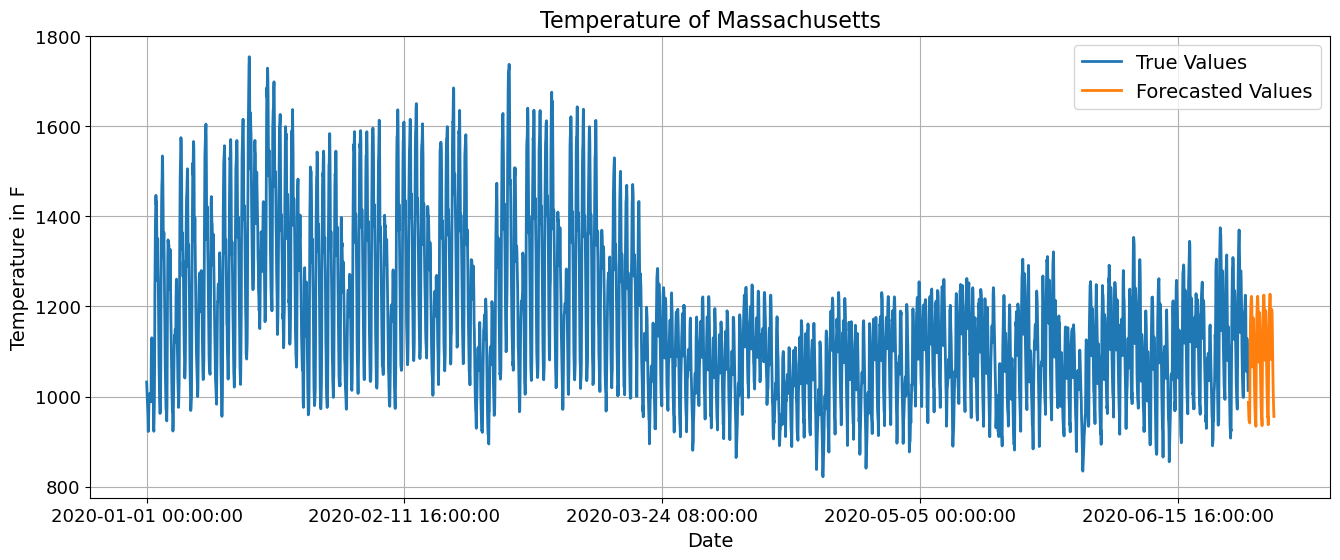

In [69]:
X_preds = model1.forecast(100)

plot_series(
    df_new['nat_demand'], X_preds, 
    title='Temperature of Massachusetts',
    y_label='Temperature in F', 
    forecast=True
)

In [91]:
X_preds_24 =model1.predict(len(X)-25,len(X)+10)
len(X_preds_24)

36

In [80]:
df_new

,datetime,nat_demand
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,1032.2630
2020-01-01 01:00:00,2020-01-01 01:00:00,1017.5806
2020-01-01 02:00:00,2020-01-01 02:00:00,1000.2797
2020-01-01 03:00:00,2020-01-01 03:00:00,987.2383
2020-01-01 04:00:00,2020-01-01 04:00:00,970.3667
...,...,...
2020-06-26 20:00:00,2020-06-26 20:00:00,1128.5592
2020-06-26 21:00:00,2020-06-26 21:00:00,1112.7488
2020-06-26 22:00:00,2020-06-26 22:00:00,1081.5680


In [86]:
df_new['nat_demand'].iloc[-25:-1]

datetime
2020-06-26 00:00:00    1106.9260
2020-06-26 01:00:00    1068.2532
2020-06-26 02:00:00    1040.0120
2020-06-26 03:00:00    1016.4073
2020-06-26 04:00:00    1000.7215
2020-06-26 05:00:00     997.9285
2020-06-26 06:00:00     998.4030
2020-06-26 07:00:00    1063.6294
2020-06-26 08:00:00    1145.1510
2020-06-26 09:00:00    1173.6152
2020-06-26 10:00:00    1191.1005
2020-06-26 11:00:00    1192.4966
2020-06-26 12:00:00    1208.1201
2020-06-26 13:00:00    1225.1657
2020-06-26 14:00:00    1220.4969
2020-06-26 15:00:00    1183.0068
2020-06-26 16:00:00    1093.5472
2020-06-26 17:00:00    1055.9591
2020-06-26 18:00:00    1077.9756
2020-06-26 19:00:00    1127.2491
2020-06-26 20:00:00    1128.5592
2020-06-26 21:00:00    1112.7488
2020-06-26 22:00:00    1081.5680
2020-06-26 23:00:00    1041.6240
Name: nat_demand, dtype: float64

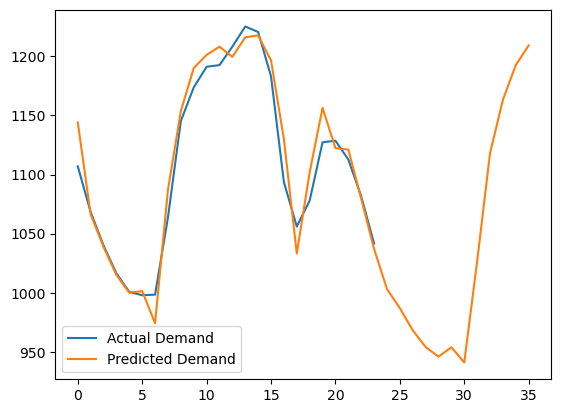

In [94]:
plt.plot(np.arange(24),df_new['nat_demand'].iloc[-25:-1])
plt.plot(np.arange(36),X_preds_24)
plt.legend(['Actual Demand','Predicted Demand'])
plt.show()